In [11]:
library(tidyverse)
options(repr.plot.width = 7)
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")

In [12]:
species_2 = 'drerio'
species_1 = 'xtropicalis'

In [13]:
data <- read_csv(paste0("o2o_heatmap_data_drerio_xtropicalis_1TPM.csv"))

Rows: 6 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): spec_category_xtropicalis
dbl (6): cell type enhanced, cell type enriched, group enhanced, group enric...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [14]:
data

spec_category_xtropicalis,cell type enhanced,cell type enriched,group enhanced,group enriched,low cell type specificity,lowly expressed
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cell type enhanced,14.45,7.09,10.42,2.97,9.45,15.33
cell type enriched,4.26,10.29,8.31,10.32,1.85,5.62
group enhanced,8.53,6.61,13.36,6.71,2.49,6.43
group enriched,2.30,4.67,7.38,13.89,0.77,1.62
low cell type specificity,19.56,2.74,5.81,1.43,55.40,23.80
lowly expressed,17.55,8.57,6.02,1.35,13.82,67.86


In [15]:
order = c( 'lowly expressed', 'low cell type specificity', 'group enhanced', 'group enriched', 'cell type enhanced', 'cell type enriched')

In [16]:
options(repr.plot.width = 4, repr.plot.height = 3)


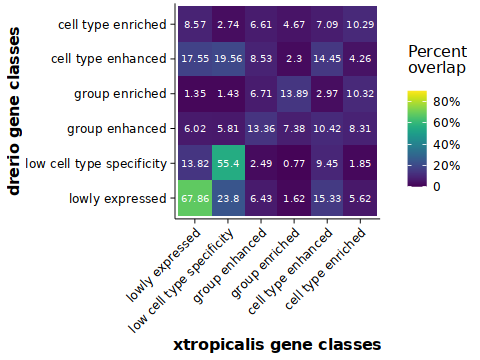

In [17]:
data %>% pivot_longer(cols = -c(1), names_to = paste0('spec_category_',species_2), values_to = 'pct')  %>% 
    rename(spec_category_species_1 = eval(paste0('spec_category_',species_1))) %>% 
    rename(spec_category_species_2 = eval(paste0('spec_category_',species_2))) %>% 
    mutate(spec_category_species_1 = factor(spec_category_species_1, levels = order)) %>% 
    mutate(spec_category_species_2 = factor(spec_category_species_2, levels = order)) %>% 
    ggplot(aes(x = spec_category_species_1, 
               y = spec_category_species_2,
               fill = pct)) +
    geom_tile() + 
    geom_text(aes(label = pct, color = ifelse(pct > 70, 'black', 'white')), size = 2, show.legend = FALSE) +
    scale_fill_viridis(limits = c(0, 90), breaks = c(0, 20, 40, 60, 80), 
                       labels = c(0, '20%', '40%', '60%', '80%'), name = 'Percent\noverlap') +
    common_45x  +
    scale_colour_manual(values=c("white"="white", "black"="black")) +
    labs(x = paste0(species_1, ' gene classes'), y = paste0(species_2, ' gene classes'))

In [18]:
options(repr.plot.width = 7, repr.plot.height = 6)


In [20]:
fig = data %>% pivot_longer(cols = -c(1), names_to = paste0('spec_category_',species_2), values_to = 'pct')  %>% 
    rename(spec_category_species_1 = eval(paste0('spec_category_',species_1))) %>% 
    rename(spec_category_species_2 = eval(paste0('spec_category_',species_2))) %>% 
    mutate(spec_category_species_1 = factor(spec_category_species_1, levels = order)) %>% 
    mutate(spec_category_species_2 = factor(spec_category_species_2, levels = order)) %>% 
    ggplot(aes(x = spec_category_species_1, 
               y = spec_category_species_2,
               fill = pct)) +
    geom_tile() + 
    geom_text(aes(label = pct, color = ifelse(pct > 70, 'black', 'white')), size = 2, show.legend = FALSE) +
    scale_fill_viridis(limits = c(0, 90), breaks = c(0, 20, 40, 60, 80), 
                       labels = c(0, '20%', '40%', '60%', '80%'), name = 'Percent\noverlap') +
    common_45x  +
    scale_colour_manual(values=c("white"="white", "black"="black")) +
    labs(x = paste0(species_1, ' gene classes'), y = paste0(species_2, ' gene classes'))

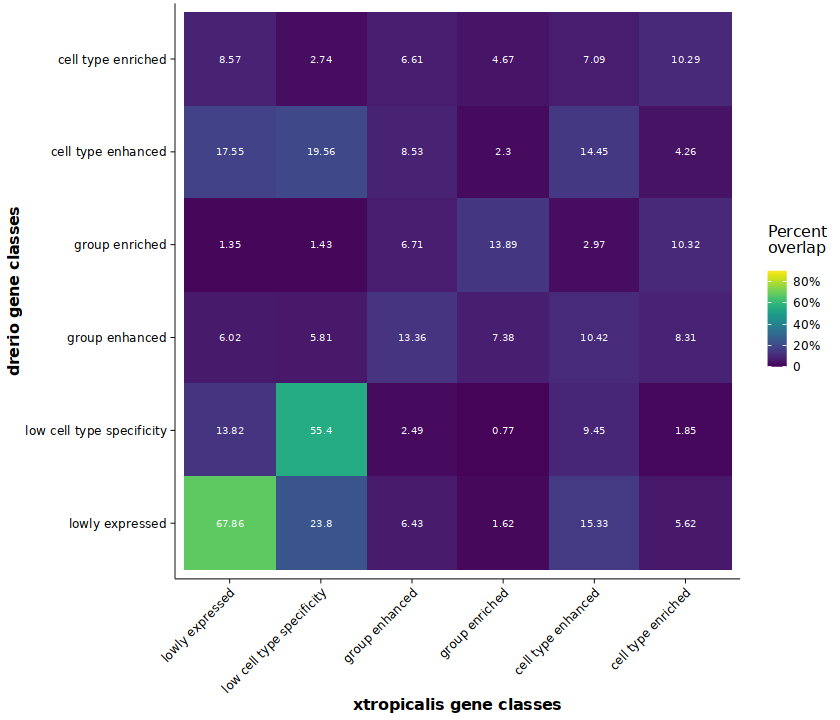

In [21]:
fig

In [22]:
saveRDS(object = fig, file =  paste0( "drerio_xtropicalis_one2one_heatmap_1TPM_r.rds"))

ggsave(plot = fig, filename = paste0( "drerio_xtropicalis_one2one_heatmap_1TPM_r.pdf"), height = 3, width = 4)


Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”


In [23]:
data_dist <- read_csv("o2o_heatmap_data_dist_drerio_xtropicalis_1TPM.csv")

Rows: 5 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): dist_category_xtropicalis
dbl (5): expressed in less than 30%, expressed in over 30%, expressed in ove...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [25]:
order_dist =  rev(c('expressed in over 90%','expressed in over 30%','expressed in less than 30%','expressed in single','lowly expressed'))


In [28]:
fig_dist = data_dist %>%
pivot_longer(cols = -c(1), names_to = paste0('dist_category_',species_2), values_to = 'pct')  %>% 
    rename(spec_category_species_1 = eval(paste0('dist_category_',species_1))) %>% 
    rename(spec_category_species_2 = eval(paste0('dist_category_',species_2))) %>% 
    mutate(spec_category_species_1 = factor(spec_category_species_1, levels = order_dist)) %>% 
    mutate(spec_category_species_2 = factor(spec_category_species_2, levels = order_dist)) %>% 
    ggplot(aes(x = spec_category_species_1, 
               y = spec_category_species_2,
               fill = pct)) +
    geom_tile() + 
    geom_text(aes(label = pct, color = ifelse(pct > 70, 'black', 'white')), size = 2, show.legend = FALSE)+
    scale_fill_viridis(limits = c(0, 100), breaks = c(0, 20, 40, 60, 80, 100), option = 'plasma',
                       labels = c(0, '20%', '40%', '60%', '80%', '100%'), name = 'Percent\noverlap') +
    common_45x  +
    scale_colour_manual(values=c("white"="white", "black"="black")) +
    labs(x = paste0(species_1, ' gene classes'), y = paste0(species_2, ' gene classes'))

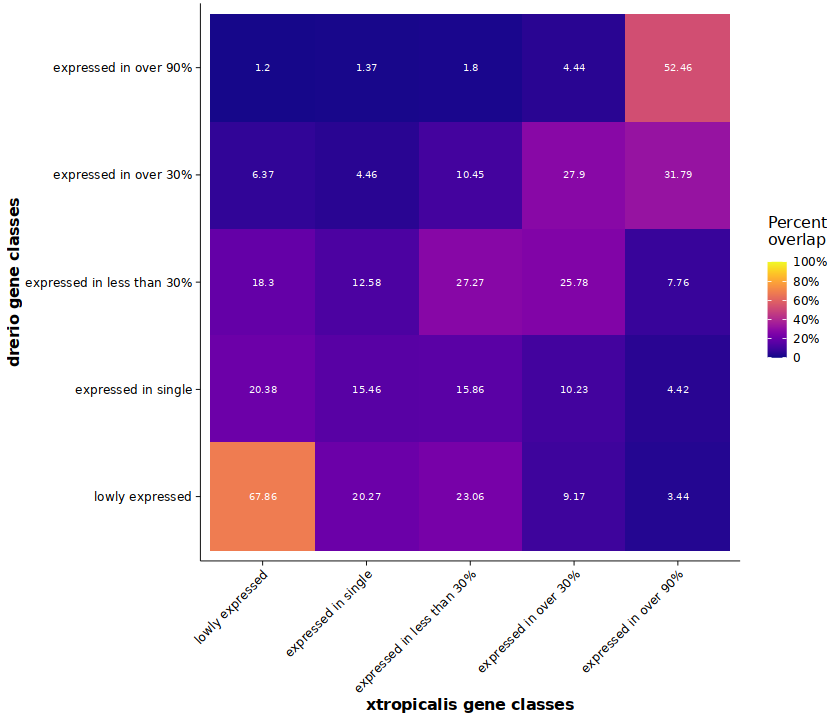

In [30]:
fig_dist

In [31]:
saveRDS(object = fig_dist, 
        file =  paste0( "drerio_xtropicalis_one2one_heatmap_dist_1TPM_r.rds"))

ggsave(plot = fig_dist, 
       filename = paste0( "drerio_xtropicalis_one2one_heatmap_dist_1TPM_r.pdf"), height = 3, width = 4)


Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”


spec_category_xtropicalis,cell type enhanced,cell type enriched,group enhanced,group enriched,low cell type specificity,lowly expressed
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cell type enhanced,14.45,7.09,10.42,2.97,9.45,15.33
cell type enriched,4.26,10.29,8.31,10.32,1.85,5.62
group enhanced,8.53,6.61,13.36,6.71,2.49,6.43
group enriched,2.30,4.67,7.38,13.89,0.77,1.62
low cell type specificity,19.56,2.74,5.81,1.43,55.40,23.80
lowly expressed,17.55,8.57,6.02,1.35,13.82,67.86
